# Diabetes Medical Diagnosis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Getting the Data

In [3]:
column_names = ["Pregnancies", "Glucose", "BPressure", "Skinfold", "Insulin", "BMI", "Pedigree", "Age", "Class"]
df = pd.read_csv("data.csv", names = column_names)
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BPressure,Skinfold,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BPressure    768 non-null    int64  
 3   Skinfold     768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   Pedigree     768 non-null    float64
 7   Age          768 non-null    int64  
 8   Class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.corr()

,Pregnancies,Glucose,BPressure,Skinfold,Insulin,BMI,Pedigree,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skinfold,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Replacing zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [6]:
df[['Glucose','BPressure','Skinfold','Insulin','BMI']] = df[['Glucose','BPressure','Skinfold','Insulin','BMI']].replace(0,np.NaN)

## showing the count of NAN
print(df.isnull().sum())

Pregnancies      0
Glucose          5
BPressure       35
Skinfold       227
Insulin        374
BMI             11
Pedigree         0
Age              0
Class            0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

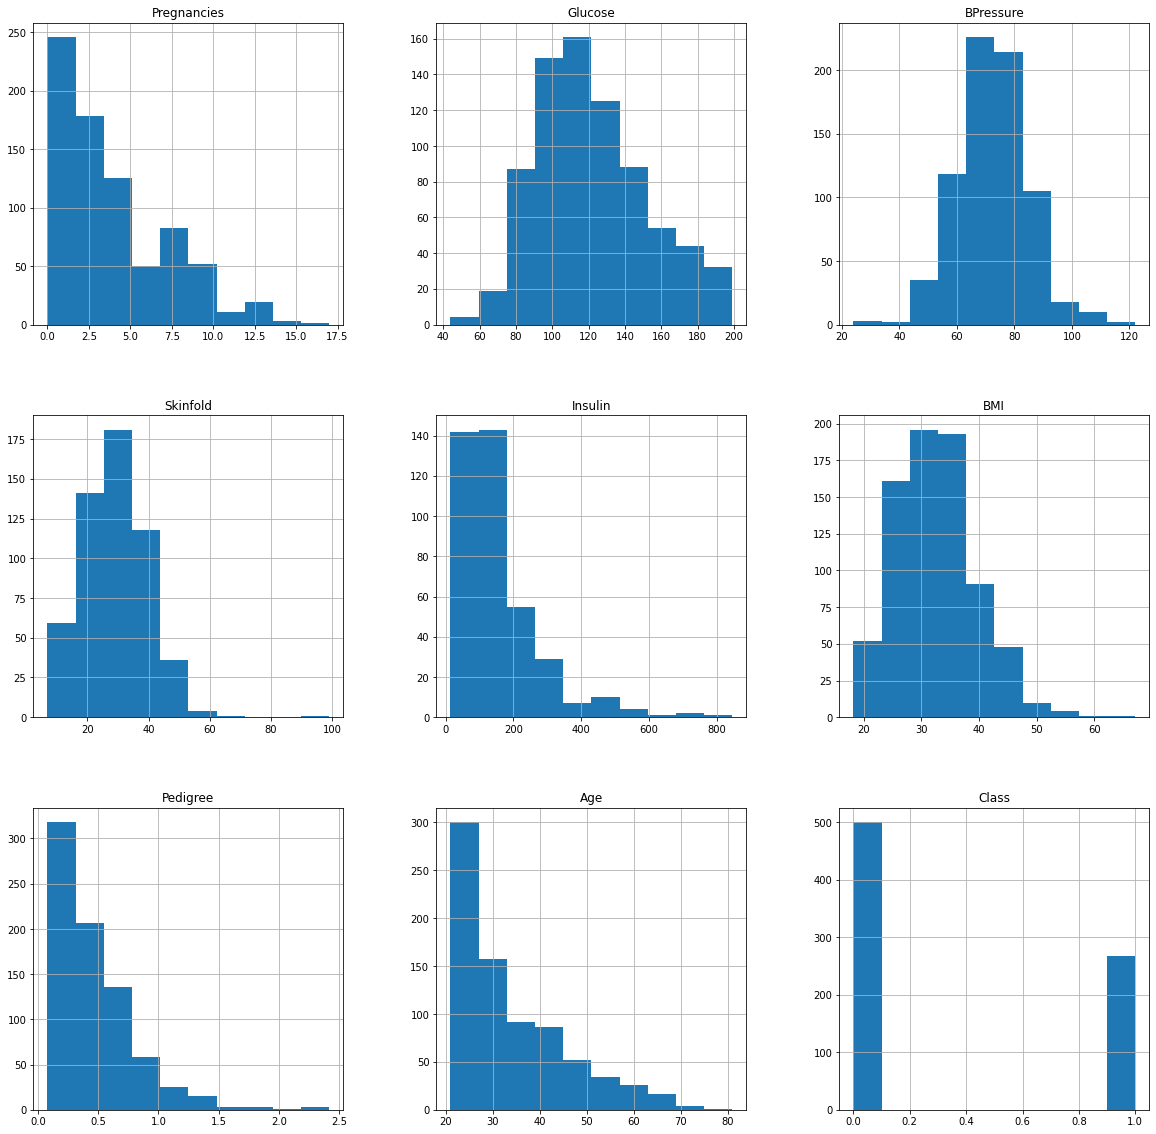

In [7]:
df.hist(figsize = (20,20));

### Aiming to impute nan values for the columns in accordance with their distribution

### As the data is skewed, median is used for Skinfold, Insulin, and BMI

In [8]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BPressure'].fillna(df['BPressure'].mean(), inplace = True)
df['Skinfold'].fillna(df['Skinfold'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

0    500
1    268
Name: Class, dtype: int64


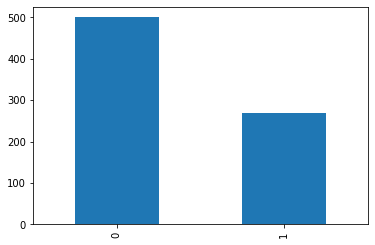

In [9]:
print(df.Class.value_counts())
p=df.Class.value_counts().plot(kind="bar")

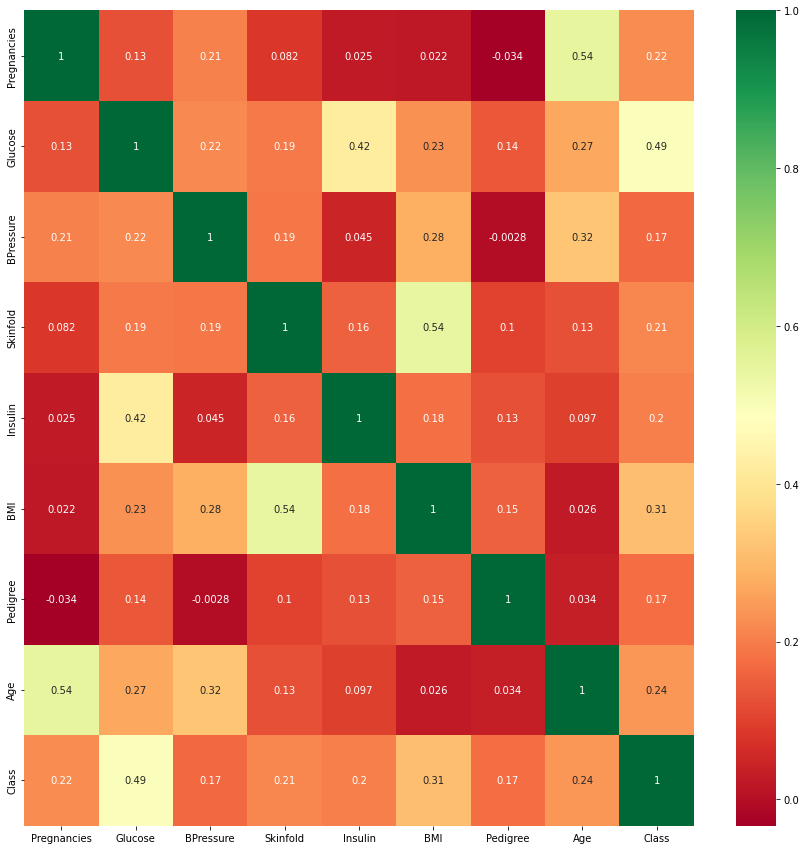

In [10]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

## Extracting Features

In [11]:
y = df.pop('Class')
X = df
print(X.shape, y.shape)

(768, 8) (768,)


## Split Dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Standardizing the Features

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:5, :])

[[ 1.50755225 -1.09966742 -0.91333816 -0.03718558 -0.20176417 -1.45629684
  -0.98325882 -0.04863985]
 [-0.82986389 -0.133331   -1.25078001  0.74371157 -0.55359045  0.09212153
  -0.62493647 -0.88246592]
 [-1.12204091 -1.03302353  0.60515017 -0.03718558 -0.20176417 -0.03691333
   0.39884168 -0.5489355 ]
 [ 2.38408331  0.5997518   0.7738711   1.52460873  2.06808279  0.93801676
   0.17903049  2.03592532]
 [ 1.50755225  0.76636153  0.60515017  1.85927893 -0.145018    0.75163306
   0.50724171  0.53503839]]


## Training a Support Vector Machine

In [14]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Accuracy achieved

In [15]:
y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.7638888888888888


## Using other SVM Kernels

In [16]:
for k in ('linear', 'rbf', 'poly', 'sigmoid'):
    clf = svm.SVC(kernel = k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k, accuracy_score(y_train, y_pred))

linear 0.7638888888888888
rbf 0.8263888888888888
poly 0.7986111111111112
sigmoid 0.6857638888888888


## Taking the Best Model

In [17]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

## Accuracy on Testing Set

In [18]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7552083333333334


## Precision and Recall

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       130
           1       0.67      0.48      0.56        62

    accuracy                           0.76       192
   macro avg       0.72      0.68      0.70       192
weighted avg       0.74      0.76      0.74       192



## Training a Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
Y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,Y_pred))

0.7708333333333334


In [22]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.68      0.55      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



## Training a KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [24]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [25]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.72916666666666 % and k = [9, 11, 13]


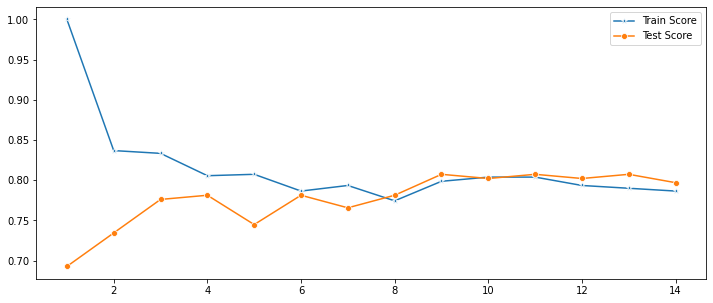

In [26]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured between k = 10 to 12 hence 11 is used for the final model

In [27]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8072916666666666

In [28]:
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



### Here, we can see knn performed better than others and gave better accuracy.

In [29]:
patient = np.array([[1., 200., 75., 40., 0., 45., 1.5, 20]])
patient = sc.transform(patient)
pred = knn.predict(patient)

if pred == 1:
    print("Patient has diabetes")
if pred == 0:
    print("Patient does not have diabetes")

Patient has diabetes


In [30]:
patient = np.array([[1., 50., 75., 40., 0., 45., 1.5, 20]])
patient = sc.transform(patient)
pred = knn.predict(patient)

if pred == 1:
    print("Patient has diabetes")
if pred == 0:
    print("Patient does not have diabetes")

Patient does not have diabetes


In [31]:
import warnings
import pickle
warnings.filterwarnings("ignore")

pickle.dump(knn,open('diabetes.pkl','wb'))